In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### In this notebook, we're going to explore first of the training set, make some EDA see how those features are what they are, then select our features and finally train a classifier which predicts whether a person survived or not.  

In [2]:
train = pd.read_csv('train.csv', header='infer', index_col='PassengerId')
test = pd.read_csv('test.csv', header='infer', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check the **shape** of dataset and see if there are any **zeros** or **NaNs**. As well as some **basic summary** about the dataframe.

In [3]:
print('****** DFs shape: ******', train.shape)
print(train.info())
print(train.describe())

****** DFs shape: ****** (891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.00000

##### Initial Hypothesis.
    * Women are likely to survive more than men.
    * First class people, are likely to survive more.
    * People travelling without any relatives are more likely to survive
    
 Let's check those hyposesis with some metrics and visualizatons!

In [4]:
train.loc[:, train.isnull().any()].head()

,Age,Cabin,Embarked
PassengerId,,,
1,22.0,NaN,S
2,38.0,C85,C
3,26.0,NaN,S
4,35.0,C123,S
5,35.0,NaN,S


We can see that **Age** and **Cabin** columns have quite some NaN, this will need to be fixed.

#### For now, let's explore the data through some plots.

In [5]:
print(train['Embarked'].value_counts())

# We will fill the missing values in Embarked with 'S' which is the most common.
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked']  = test['Embarked'].fillna('S')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
# We'll fill the missing age values by the mean for training and testing data.
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [7]:
train.loc[:, train.isnull().any()].head()

,Cabin
PassengerId,
1,NaN
2,C85
3,NaN
4,C123
5,NaN


In [8]:
survived = train['Survived'] == 1
male = train['Sex'] == 'male'
female = train['Sex'] == 'female'

print('Average age of male who survived', train[survived & male].Age.mean())
print('Average age of female who survived', train[survived & female].Age.mean())

Average age of male who survived 27.382293578
Average age of female who survived 28.7167381974


#### You might have noticed that in the text Column there are some tittles for people.

Let's get a count for those.


In [9]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+).', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Billiard,0,1
Capt,0,1
Carlo,0,1
Col,0,2
Cruyssen,0,1
Don,0,1
Dr,1,6
Gordon,1,1
Impe,2,1


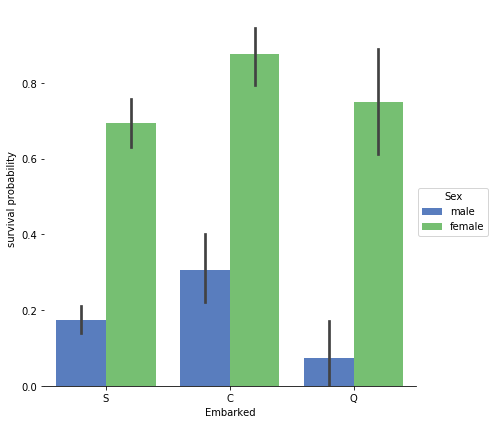

In [10]:
g = sns.factorplot(x="Embarked", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


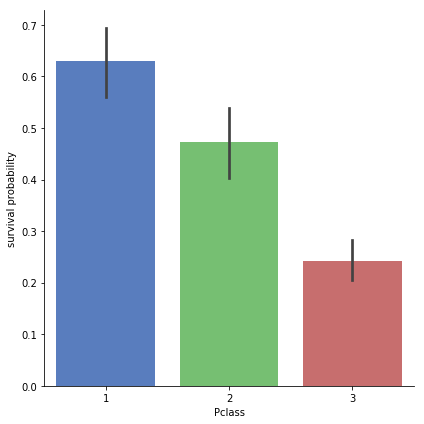

In [11]:
print(train[['Pclass', 'Survived']].groupby('Pclass').mean())
g = sns.factorplot(x="Pclass", y="Survived", data=train,
                   size=6, kind="bar", palette="muted")
g.set_ylabels("survival probability")

        Survived
Sex             
female  0.742038
male    0.188908


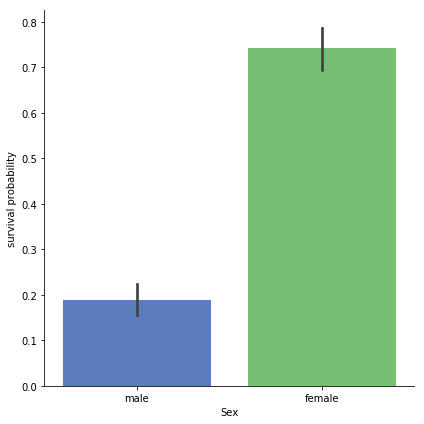

In [12]:
print(train[['Sex', 'Survived']].groupby('Sex').mean())

g = sns.factorplot(x="Sex", y="Survived", data=train,
                   size=6, kind="bar", palette="muted")
g.set_ylabels("survival probability")

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


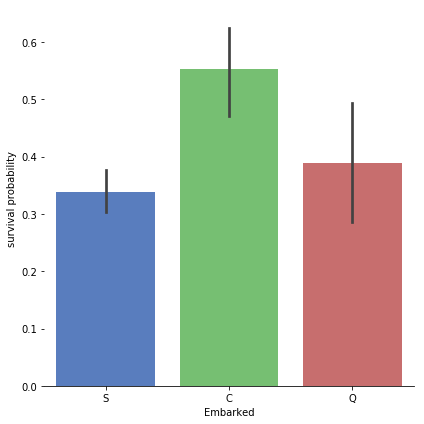

In [13]:
print(train[['Embarked', 'Survived']].groupby('Embarked').mean())
g = sns.factorplot(x="Embarked", y="Survived", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

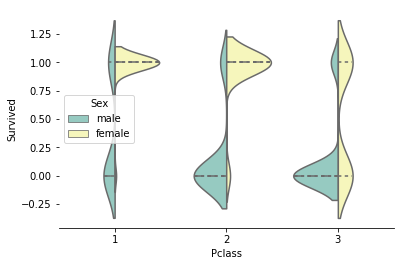

In [14]:
sns.violinplot(x="Pclass", y="Survived", hue="Sex", data=train, split=True,
               inner="quart", palette="Set3")
sns.despine(left=True)

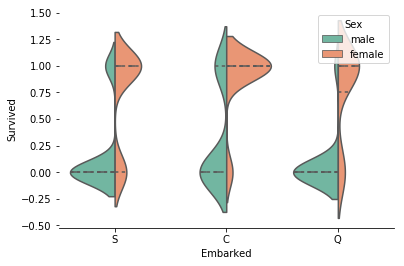

In [15]:
sns.violinplot(x="Embarked", y="Survived", hue="Sex", data=train, split=True,
               inner="quart", palette="Set2")
sns.despine(left=True)

###### From the plots we can validate the following assumptions:

    * Women survived more than men, gentleman titanic people.
    * People who embarked from Cherbourg survived more.
    * First class people survived more than other classes, their survival percentage is 63%!
    * Survival was lowest in third class passengers.

##### It is safe to assume the following:
    - Cabine feature seems to be irrelevant to whether a person survived or not, plus there are a lot of missing values.
    - Ticket doesn't really affect survival.
    - Fare either
    - And name

In [16]:
train.drop(['Name', 'Fare', 'Ticket', 'Cabin'], axis=1).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,S,Mr
2,1,1,female,38.0,1,0,C,Mrs
3,1,3,female,26.0,0,0,S,Miss
4,1,1,female,35.0,1,0,S,Mrs
5,0,3,male,35.0,0,0,S,Mr


In [17]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [18]:
test.drop(['Name', 'Fare', 'Ticket', 'Cabin'], axis=1).head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
892,3,male,34.5,0,0,Q
893,3,female,47.0,1,0,S
894,2,male,62.0,0,0,Q
895,3,male,27.0,0,0,S
896,3,female,22.0,1,1,S


In [20]:
# Here some mapping to encode categorical variables.

sex_mapping  = {'male': 1, 'female': 0}
embark_encode = {'C': 1, 'S': 2, 'Q': 3}

In [21]:
test.head()
test['Sex'] = test['Sex'].map(sex_mapping)
test['Embarked'] = test['Embarked'].map(embark_encode)

In [22]:

train['Sex'] = train['Sex'].map(sex_mapping)

In [23]:

train['Embarked'] = train['Embarked'].map(embark_encode)

In [24]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,Mrs
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr


In [25]:
X_train = train.loc[:, ['Pclass', 'Sex', 'Age', 'Embarked']]
Y_train = train.loc[:, ['Survived']]

X_test = test.loc[:, ['Pclass', 'Sex', 'Age', 'Embarked']]

print(X_test.head())
print(X_test.info())

             Pclass  Sex   Age  Embarked
PassengerId                             
892               3    1  34.5         3
893               3    0  47.0         2
894               2    1  62.0         3
895               3    1  27.0         2
896               3    0  22.0         2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 4 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
Embarked    418 non-null int64
dtypes: float64(1), int64(3)
memory usage: 16.3 KB
None


In [26]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
# acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
# print(acc_logreg)
print(round(lr.score(X_train, Y_train) * 100, 2))

79.8


/home/shannon/Python_projects/Envs/mlbook/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print(round(clf.score(X_train, Y_train) * 100, 2))

89.23


/home/shannon/Python_projects/Envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
